In [11]:
# pip install gymnasium[atari] ale-py stable-baselines3[extra]
# !pip install ale-py autorom[accept-rom-license] --quiet

In [10]:
# import ale_py
# from ale_py.roms import ROM_LIST
# from autorom import main as autorom_main

# # Download Atari ROMs
# autorom_main()

In [5]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.atari_wrappers import AtariWrapper
import os

# Create and wrap the Atari environment
def make_env():
    env = gym.make("ALE/WordZapper-v5", render_mode="rgb_array")  # use "human" locally
    env = AtariWrapper(env)
    return env

env = DummyVecEnv([make_env])

# Create PPO model with CNN policy
model = PPO("CnnPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=2_000_000)  # You can increase this as needed

# Save the model
os.makedirs("models", exist_ok=True)
model.save("models/ppo_word_zapper_2m")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cuda device
Wrapping the env in a VecTransposeImage.
-----------------------------
| time/              |      |
|    fps             | 233  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 2           |
|    time_elapsed         | 19          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.020521339 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.88       |
|    explained_variance   | -5.28       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.064      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0317     |
|    value_loss           | 0.00801     |
-----------------

In [6]:
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder

# Define a make_env function for DummyVecEnv
def make_env():
    def _init():
        env = gym.make("ALE/WordZapper-v5", render_mode="rgb_array")  # "human" for local rendering
        env = AtariWrapper(env)
        return env
    return _init

# Wrap the environment
env = DummyVecEnv([make_env()])

# Wrap with VecVideoRecorder
video_env = VecVideoRecorder(
    env,
    video_folder="./videos/",
    record_video_trigger=lambda x: x == 0,
    video_length=1000,
    name_prefix="ppo_word_zapper_2m"
)

# Reset and run
obs = video_env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, info = video_env.step(action)
    if done[0]:
        obs = video_env.reset()


video_env.close()


/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-0-to-step-1000.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-0-to-step-1000.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-390-to-step-1390.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-390-to-step-1390.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-390-to-step-1390.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-763-to-step-1763.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-763-to-step-1763.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-763-to-step-1763.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


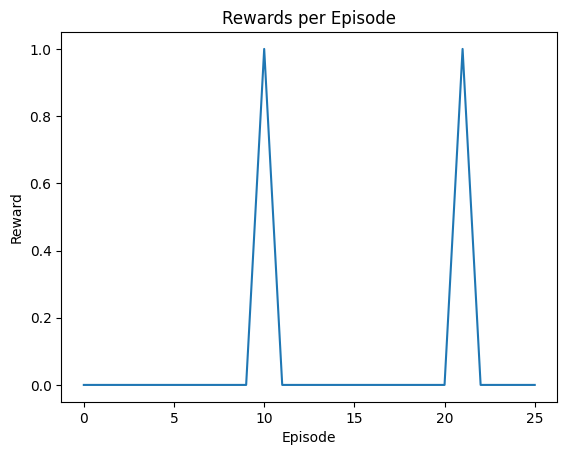

In [7]:
import matplotlib.pyplot as plt
total_reward = 0  # Initialize the total reward variable

# Create a list to store rewards for each episode
episode_rewards = []

# Example: Training loop with reward tracking
for i in range(10000):  # Change to your number of training steps
    action, _ = model.predict(obs)
    obs, reward, done, info = video_env.step(action)
    total_reward += reward[0]  # Accumulate reward
    
    if done[0]:
        episode_rewards.append(total_reward)
        total_reward = 0
        obs = env.reset()

# Plot the results
plt.plot(episode_rewards)
plt.title("Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()


In [9]:
episode_lengths = []  # To store the lengths of each episode

# Evaluate the model over several episodes
for episode in range(10):  # Evaluate over 10 episodes
    done = False
    episode_length = 0  # Reset episode length
    
    obs = video_env.reset()  # Reset environment at the start of each episode
    
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        
        # Take action in the environment
        obs, reward, done, info = video_env.step(action)
        
        episode_length += 1  # Increment length for each step
        
        if done[0]:
            episode_lengths.append(episode_length)  # Record episode length
            break  # End the episode

# Calculate average episode length
avg_episode_length = np.mean(episode_lengths)
print(f"Average episode length over {len(episode_lengths)} episodes: {avg_episode_length}")


Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-14613-to-step-15613.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-14613-to-step-15613.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-14613-to-step-15613.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-15027-to-step-16027.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-15027-to-step-16027.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-15027-to-step-16027.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-15416-to-step-16416.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-15416-to-step-16416.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-15416-to-step-16416.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-15798-to-step-16798.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-15798-to-step-16798.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-15798-to-step-16798.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-16177-to-step-17177.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-16177-to-step-17177.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-16177-to-step-17177.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-16599-to-step-17599.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-16599-to-step-17599.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-16599-to-step-17599.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-16987-to-step-17987.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-16987-to-step-17987.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-16987-to-step-17987.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-17367-to-step-18367.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-17367-to-step-18367.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-17367-to-step-18367.mp4
Moviepy - Building video /kaggle/working/videos/ppo_word_zapper_2m-step-17748-to-step-18748.mp4.
Moviepy - Writing video /kaggle/working/videos/ppo_word_zapper_2m-step-17748-to-step-18748.mp4



Moviepy - Done !
Moviepy - video ready /kaggle/working/videos/ppo_word_zapper_2m-step-17748-to-step-18748.mp4
Average episode length over 10 episodes: 389.7


In [8]:
import numpy as np

# Reset the environment and initialize variables to track evaluation performance
obs = env.reset()  # Reset the environment
total_reward = 0
episode_rewards = []

# Evaluate the model over several episodes
for episode in range(10):  # Let's evaluate over 10 episodes
    done = False
    episode_reward = 0
    
    while not done:
        # Predict the action using the trained model
        action, _ = model.predict(obs, deterministic=True)
        
        # Take the action in the environment
        obs, reward, done, info = video_env.step(action)
        
        # Accumulate rewards
        episode_reward += reward[0]  # assuming reward is an array
        if done[0]:
            episode_rewards.append(episode_reward)
            obs = env.reset()  # Reset environment for the next episode

# Calculate the average reward
avg_reward = np.mean(episode_rewards)
print(f"Average reward over {len(episode_rewards)} episodes: {avg_reward}")


Average reward over 10 episodes: 0.0
